In [1]:
#importing package
import warnings
warnings.filterwarnings("ignore")
import itertools
itertools.groupby
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
file_path = 'C:\\Users\\Child-PC\\Documents\\Doc\\Kerja\\Jakarta Smart City\\Data\\Predictive\\Fatmawati thamrin\\Average speed fatmawati thamrin.xlsx'

time_series = pd.read_excel(file_path)

#Melakukan reset index
time_series = time_series.reset_index()
#Setting kolom tanggal menjadi format datetime
time_series['Tanggal'] = pd.to_datetime(time_series['Tanggal'])
#Setting tanggal sebagai index
time_series = time_series.set_index('Tanggal')
#Menghapus kolom index
cols = ['index']
time_series.drop(cols, axis=1, inplace=True)
#Menampilkan data setelah cleaning
time_series

,Fatmawati,Panglima Polim,Sisingamangaraja,Jenderal Sudirman,MH Thamrin
Tanggal,,,,,
2019-01-01,17.376960,6.957529,9.197301,NaN,14.105469
2019-01-02,15.682563,5.560370,8.236382,11.707729,10.701706
2019-01-03,13.735798,6.086657,7.093376,10.188881,13.504935
2019-01-04,12.891066,5.808450,9.181057,12.012760,10.971397
2019-01-05,12.701404,5.701319,8.518150,17.619137,14.980375
2019-01-06,18.161720,7.490725,9.734099,14.509202,10.820507
2019-01-07,11.698292,6.424619,8.533449,14.540660,14.530612
2019-01-08,9.651816,4.750943,8.857869,11.382819,13.084725
2019-01-09,11.014376,4.985365,8.250382,12.298763,13.561947


In [2]:
#Checking "null" value from the data
time_series.isnull().sum()

Fatmawati             4
Panglima Polim        5
Sisingamangaraja      4
Jenderal Sudirman    15
MH Thamrin            3
dtype: int64

In [3]:
#Melakukan smoothing moving average dengan 3 range interval ( (t)= [t+(t-1)+(t-2)]/3 )
rolling = time_series.rolling(window = 3)
y = rolling.mean() #mean(): digunakan untuk mencari rata-rata dari window yang telah ditentukan
y.head()

,Fatmawati,Panglima Polim,Sisingamangaraja,Jenderal Sudirman,MH Thamrin
Tanggal,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,15.598440,6.201519,8.175686,NaN,12.770703
2019-01-04,14.103142,5.818492,8.170272,11.303123,11.726013
2019-01-05,13.109423,5.865475,8.264195,13.273593,13.152236


In [4]:
#Checking "null" value data smoothing
y.isnull().sum()

Fatmawati            12
Panglima Polim       15
Sisingamangaraja     12
Jenderal Sudirman    33
MH Thamrin           11
dtype: int64

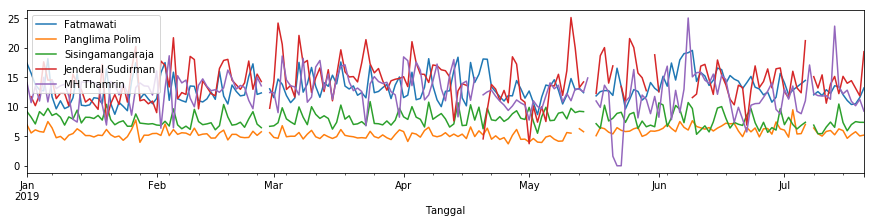

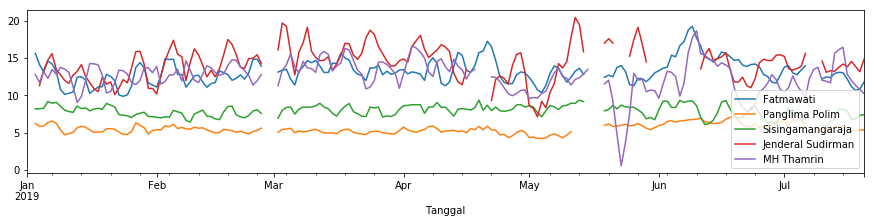

In [5]:
#ploting data asli dengan hasil smoothing menggunakan moving average
a = time_series.plot(figsize=(15, 3))
b = y.plot(figsize=(15, 3))
plt.show()

In [6]:
#Inisiasi variabel (agar lebih simple)
fat = time_series['Fatmawati']
pol = time_series['Panglima Polim']
sis = time_series['Sisingamangaraja']
sud = time_series['Jenderal Sudirman']
tha = time_series['MH Thamrin']

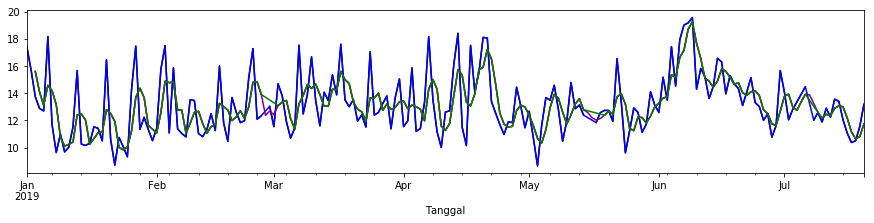

In [7]:
#source for interpolate : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html#pandas-series-interpolate

#Membandingkan smoothing, interpolasi, smoothing-interpolasi, interpolasi-smoothing
fat_roll = y['Fatmawati'] #Smoothing data untuk kolom Fatmawati
fat_intp = time_series['Fatmawati'].interpolate() #Interpolasi data untuk kolom Fatmawati
fat_intp_roll = fat_intp.rolling(window=3).mean() #Interpolasi-smoothing data untuk kolom Fatmawati
fat_roll_intp = fat_roll.interpolate() #Smoothing-interpolasi data untuk kolom Fatmawati

fat.plot(figsize=(15, 3), color = 'black')

fat_roll.plot(figsize=(15, 3), color = 'red')
fat_intp.plot(figsize=(15, 3), color = 'blue')

fat_intp_roll.plot(figsize=(15, 3), color = 'purple')
fat_roll_intp.plot(figsize=(15, 3), color = 'green')

plt.show()

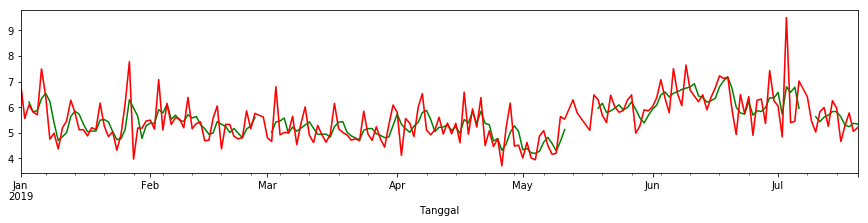

In [13]:
pol_roll = y['Panglima Polim']
pol_intp = pol.interpolate()

pol.plot(figsize=(15, 3), color = 'pink')
pol_roll.plot(figsize=(15, 3), color = 'green')
pol_intp.plot(figsize=(15, 3), color = 'red')
plt.show()

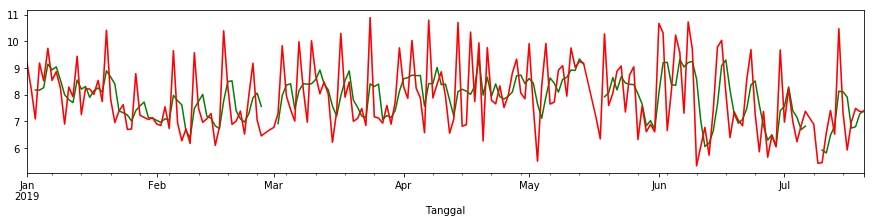

In [14]:
sis_roll = y['Sisingamangaraja']
sis_intp = sis.interpolate()

sis.plot(figsize=(15, 3), color = 'pink')
sis_roll.plot(figsize=(15, 3), color = 'green')
sis_intp.plot(figsize=(15, 3), color = 'red')
plt.show()

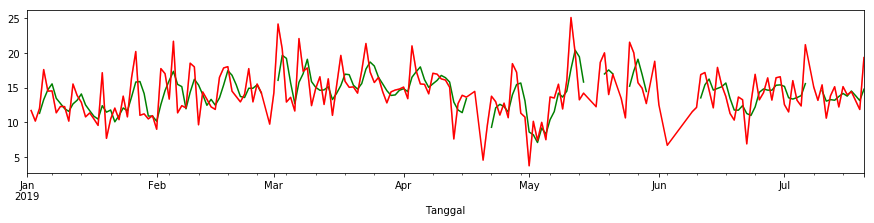

In [15]:
sud_roll = y['Jenderal Sudirman']
sud_intp = sud.interpolate()

sud.plot(figsize=(15, 3), color = 'pink')
sud_roll.plot(figsize=(15, 3), color = 'green')
sud_intp.plot(figsize=(15, 3), color = 'red')
plt.show()

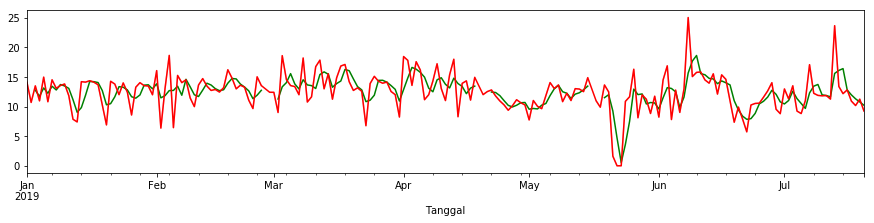

In [16]:
tha_roll = y['MH Thamrin']
tha_intp = tha.interpolate()

tha.plot(figsize=(15, 3), color = 'pink')
tha_roll.plot(figsize=(15, 3), color = 'green')
tha_intp.plot(figsize=(15, 3), color = 'red')
plt.show()

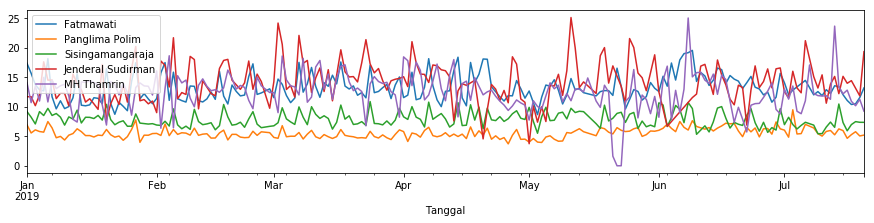

In [12]:
#interpolasi untuk data asli
y_intp = time_series.interpolate(limit_direction='both')
y_intp.plot(figsize=(15,3))
plt.show()

In [17]:
#Checking "null" value for new data
y_intp.isnull().sum()

Fatmawati            0
Panglima Polim       0
Sisingamangaraja     0
Jenderal Sudirman    0
MH Thamrin           0
dtype: int64

In [20]:
new_data = y_intp

In [21]:
export_data = new_data.to_excel(r'C:\\Users\\Child-PC\\Documents\\Doc\\Kerja\\Jakarta Smart City\\Data\\Predictive\\Fatmawati thamrin\\Cleaning Fatmawati-Thamrin.xlsx')